In [54]:
import pandas as pd
import matplotlib.pyplot as plt

### Charger le fichier CSV :

In [53]:
df = pd.read_csv('./data/donnees-incidents.csv')

### Explorer les données :

In [52]:
# Afficher les premières lignes
df.head()

,Date,Type_Incident,Lieu,Gravité
0,2023-01-01,Cyberattaque,Paris,Moyenne
1,2023-01-02,Vol de données,NaN,Élevée
2,2023-01-03,Malware,Marseille,NaN
3,2023-01-04,Phishing,Toulouse,Moyenne
4,2023-01-05,NaN,Bordeaux,Élevée


In [51]:
# Obtenir des informations sur les colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           55 non-null     datetime64[ns]
 1   Type_Incident  46 non-null     object        
 2   Lieu           45 non-null     object        
 3   Gravité        46 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ KB


In [50]:
# Résumé statistique
df.describe()

,Date
count,55
mean,2023-02-03 19:38:10.909090816
min,2023-01-01 00:00:00
25%,2023-01-14 12:00:00
50%,2023-02-03 00:00:00
75%,2023-03-01 12:00:00
max,2023-03-15 00:00:00


### Nettoyer les données (si nécessaire) :

In [49]:
display(df.isnull().sum())

Date              0
Type_Incident     9
Lieu             10
Gravité           9
dtype: int64

In [47]:
# Remplacer ou supprimer les valeurs manquantes
display(df.isnull().sum())

Date              0
Type_Incident     9
Lieu             10
Gravité           9
dtype: int64

### Analyser les données :

In [56]:
incidents_par_type = df['Type_Incident'].value_counts()

display(incidents_par_type)

Type_Incident
Vol de données        6
Phishing              6
Cyberattaque          5
Intrusion physique    5
Malware               4
DDoS                  4
Fuite de données      4
Virus                 4
Ransomware            4
Hameçonnage           4
Name: count, dtype: int64

In [58]:
# Convertir la colonne Date en type datetime
df['Date'] = pd.to_datetime(df['Date'])

# Compter le nombre d'incidents par mois
df['Mois'] = df['Date'].dt.to_period('M')
incidents_par_mois = df.groupby('Mois').size()
print(incidents_par_mois)

Mois
2023-01    25
2023-02    15
2023-03    15
Freq: M, dtype: int64


In [59]:
# Compter le nombre d'incidents par lieu
incidents_par_lieu = df['Lieu'].value_counts()
print(incidents_par_lieu)

Lieu
Paris               3
Toulouse            3
Marseille           3
Le Havre            2
Lyon                2
Aix-en-Provence     2
Le Mans             2
Saint-Denis         2
Nîmes               2
Dijon               2
Grenoble            2
Saint-Étienne       2
Rennes              2
Nice                2
Strasbourg          2
Nantes              2
Bordeaux            2
Reims               1
Angers              1
Lille               1
Brest               1
Montpellier         1
Toulon              1
Villeurbanne        1
Clermont-Ferrand    1
Name: count, dtype: int64


 ### Visualiser les données

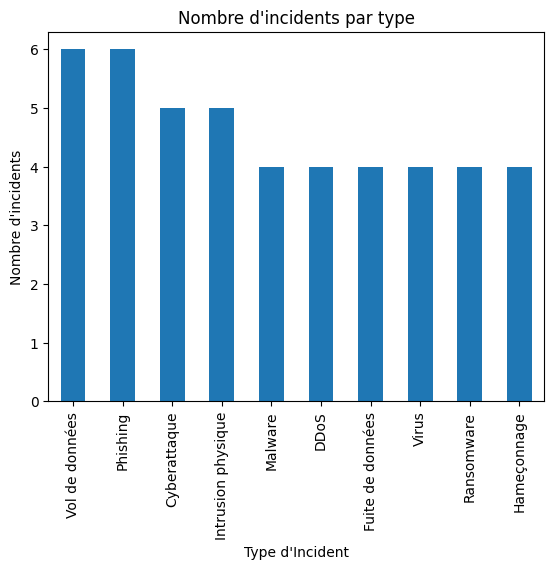

In [60]:
# Diagramme en barres pour les types d'incidents
incidents_par_type.plot(kind='bar', title='Nombre d\'incidents par type')
plt.xlabel('Type d\'Incident')
plt.ylabel('Nombre d\'incidents')
plt.show()

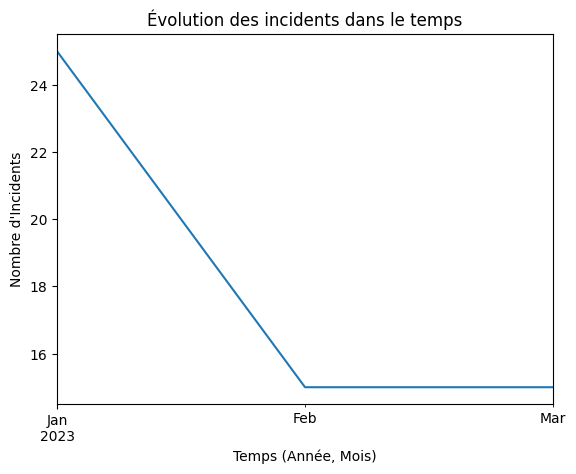

In [62]:
# Évolution des incidents dans le temps
incidents_par_mois.plot(title='Évolution des incidents dans le temps')
plt.xlabel('Temps (Année, Mois)')
plt.ylabel('Nombre d\'Incidents')
plt.show()

In [64]:
# Exporter les résultats dans un fichier CSV
df.to_csv('resultats_analyse.csv', index=False)